In [1]:
import numpy as np
import wfdb


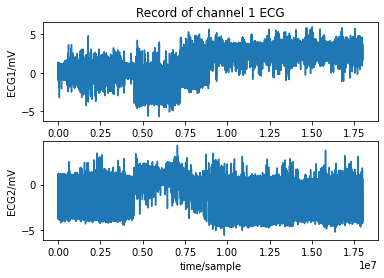

{'record_name': 'chf01',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 17994491,
 'base_time': datetime.time(10, 0),
 'base_date': None,
 'comments': ['Age: 71  Sex: M  NYHA class: III-IV'],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': array([[ 0.635, -0.64 ],
        [ 0.68 , -1.28 ],
        [ 0.63 , -1.92 ],
        ...,
        [ 2.265, -0.52 ],
        [ 2.245, -0.5  ],
        [ 2.245, -0.515]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['chf01.dat', 'chf01.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [127, -128],
 'checksum': [17579, 21162],
 'block_size': [0, 0]}

In [157]:
record = wfdb.rdrecord('E:/AI project/files/chf01') 
wfdb.plot_wfdb(record, title='Record of channel 1 ECG') 
display(record.__dict__)

In [155]:
record=wfdb.rdsamp

In [136]:
dig_rec=wfdb.rdrecord('E:/AI project/files/chf01',physical=False)
dig_rec.__dict__

{'record_name': 'chf01',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 17994491,
 'base_time': datetime.time(10, 0),
 'base_date': None,
 'comments': ['Age: 71  Sex: M  NYHA class: III-IV'],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': None,
 'd_signal': array([[ 127, -128],
        [ 136, -256],
        [ 126, -384],
        ...,
        [ 453, -104],
        [ 449, -100],
        [ 449, -103]], dtype=int64),
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['chf01.dat', 'chf01.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [127, -128],
 'checksum': [17579, 21162],
 'block_size': [0, 0]}

In [2]:
sig,fields= wfdb.rdsamp("E:/AI project/files/chf01")

In [7]:
sig

array([[ 0.635, -0.64 ],
       [ 0.68 , -1.28 ],
       [ 0.63 , -1.92 ],
       ...,
       [ 2.265, -0.52 ],
       [ 2.245, -0.5  ],
       [ 2.245, -0.515]])

In [4]:
fields

{'fs': 250,
 'sig_len': 17994491,
 'n_sig': 2,
 'base_date': None,
 'base_time': datetime.time(10, 0),
 'units': ['mV', 'mV'],
 'sig_name': ['ECG1', 'ECG2'],
 'comments': ['Age: 71  Sex: M  NYHA class: III-IV']}

In [128]:
xqrs = wfdb.processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


In [134]:
qrs_inds=xqrs.detect()

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


In [66]:
sig,fields= wfdb.rdsamp("E:/AI project/files/chf01")
sig

array([[ 0.635, -0.64 ],
       [ 0.68 , -1.28 ],
       [ 0.63 , -1.92 ],
       ...,
       [ 2.265, -0.52 ],
       [ 2.245, -0.5  ],
       [ 2.245, -0.515]])

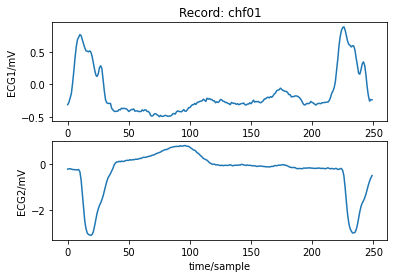

In [91]:
rec=wfdb.rdrecord('E:/AI project/files/chf01',sampfrom=202, sampto=453)
wfdb.plot_wfdb(rec)

In [84]:
sig[213]

array([ 0.765, -0.32 ])

In [85]:
sig[214]

array([ 0.75 , -0.685])

In [86]:
sig[429]

array([ 0.885, -0.51 ])

In [87]:
sig[428]

array([ 0.875, -0.265])

In [130]:
xqrs.__dict__

{'sig': array([0.635, 0.68 , 0.63 , ..., 2.265, 2.245, 2.245]),
 'fs': 250,
 'sig_len': 17994491,
 'conf': <wfdb.processing.qrs.XQRS.Conf at 0x17408653898>,
 'rr_init': 200.0,
 'rr_max': 600.0,
 'rr_min': 75.0,
 'qrs_width': 25,
 'qrs_radius': 12,
 'qrs_thr_init': 0.13,
 'qrs_thr_min': 0,
 'ref_period': 50,
 't_inspect_period': 0,
 'sampfrom': 0,
 'sampto': 17994491,
 'verbose': True,
 'fc_low': 5,
 'fc_high': 20,
 'sig_f': array([-0.02089087, -0.0060734 ,  0.00777719, ..., -0.00562774,
        -0.00546364, -0.0057673 ]),
 'filter_gain': 1.9905739878887692,
 'sig_i': array([1.85010197e-08, 3.48593637e-05, 7.53345764e-06, ...,
        2.38283711e-08, 3.52754398e-07, 1.41002839e-09]),
 'mwi_gain': 6.22698970272185,
 'transform_gain': 12.395283725089335,
 'peak_inds_i': array([      24,       54,       81, ..., 17994425, 17994443, 17994462]),
 'n_peaks_i': 441567,
 'qrs_amp_recent': 2.9308244192390838,
 'noise_amp_recent': 0.656910975614821,
 'qrs_thr': 1.1302411470181053,
 'rr_recent': 2

In [150]:
xqrs.__dict__['qrs_inds']

array([     213,      428,      644, ..., 17993826, 17994077, 17994340])

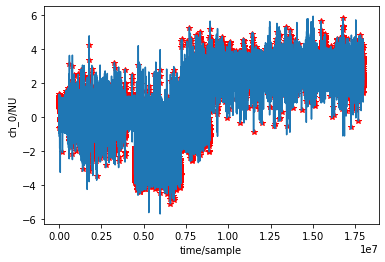

In [133]:
wfdb.plot_items(signal=sig[:,0], ann_samp=[xqrs.qrs_inds])

In [158]:
#gqrs detection
qrs_locs = wfdb.processing.gqrs_detect(record.p_signal[:,0], fs=record.fs)

In [93]:
sig[202]

array([-0.335, -0.19 ])

In [94]:
sig[420]

array([-0.105, -0.19 ])

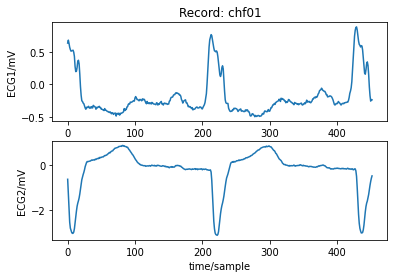

In [96]:
rec=wfdb.rdrecord('E:/AI project/files/chf01',sampfrom=0, sampto=453)
wfdb.plot_wfdb(rec)

In [101]:
import scipy
from scipy.signal import find_peaks
find_peaks(sig[0])

(array([], dtype=int64), {})

In [159]:
print(qrs_locs)

[     204      420      635 ... 17993834 17994093 17994364]


In [160]:
len(qrs_locs)

76254

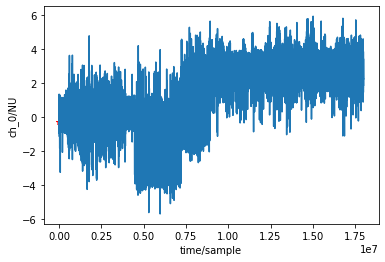

In [139]:
wfdb.plot_items(signal=sig[:,0], ann_samp=[qrs_locs])

In [141]:
#annotation evaluators
#comparitor
comparitor = wfdb.processing.Comparitor(ann.sample[1:],
                                       xqrs.qrs_inds,
                                       int(0.1 * fields['fs']),
                                       sig[:,0])
comparitor.compare()
#comparitor.print_summary()
#comparitor.plot()

In [142]:
comparitor.print_summary()

75547 reference annotations, 75542 test annotations

True Positives (matched samples): 74917
False Positives (unmatched test samples): 625
False Negatives (unmatched reference samples): 630

Sensitivity: 0.9917 (74917/75547)
Positive Predictivity: 0.9917 (74917/75542)


C:\Users\ASUS\.conda\envs\myenv\lib\site-packages\wfdb\processing\evaluate.py:365: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ASUS\.conda\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


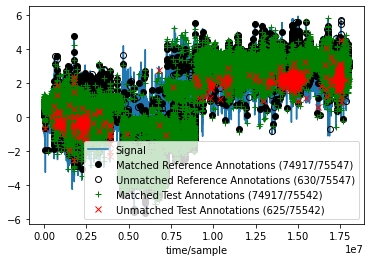

In [143]:
comparitor.plot()

In [144]:
#compare annotations
comparitor2 = wfdb.processing.compare_annotations(ann.sample[1:],
                                       xqrs.qrs_inds,
                                       int(0.1 * fields['fs']),
                                       sig[:,0])
comparitor2.print_summary()

75547 reference annotations, 75542 test annotations

True Positives (matched samples): 74917
False Positives (unmatched test samples): 625
False Negatives (unmatched reference samples): 630

Sensitivity: 0.9917 (74917/75547)
Positive Predictivity: 0.9917 (74917/75542)


In [145]:
from wfdb.processing import benchmark_mitdb, xqrs_detect
comparitors, spec, pp = benchmark_mitdb(xqrs_detect)

Benchmark complete


In [10]:
print(sig.shape)

(17994491, 2)


In [17]:
annsamp, anntype, subtype, chan, num, aux, annfs = wfdb.rdann('E:/AI project/files/chf01', 'ecg')

FileNotFoundError: [Errno 2] No such file or directory: 'E:/AI project/files/chf01.atr'

In [23]:
labels=wfdb.io.show_ann_labels

In [26]:
wrann= wfdb.io.Annotation('E:/AI project/files/chf01')

TypeError: __init__() missing 2 required positional arguments: 'extension' and 'sample'

In [28]:
wfdb.Annotation

wfdb.io.annotation.Annotation

In [29]:
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [31]:
wfdb.show_ann_classes()

     extension                        description  human_reviewed
atr        atr          Reference ECG annotations            True
blh        blh         Human reviewed beat labels            True
blm        blm                Machine beat labels           False
alh        alh              Human reviewed alarms            True
alm        alm                     Machine alarms           False
qrsc      qrsc      Human reviewed QRS detections            True
qrs        qrs             Machine QRS detections           False
bph        bph  Human reviewed BP beat detections            True
bpm        bpm         Machine BP beat detections           False


In [103]:
ann=wfdb.rdann('E:/AI project/files/chf01','ecg')

In [105]:
d=ann.__dict__
d

{'record_name': 'chf01',
 'extension': 'ecg',
 'sample': array([      28,      224,      438, ..., 17993841, 17994098, 17994362]),
 'symbol': ['N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N'

In [71]:
display(ann)

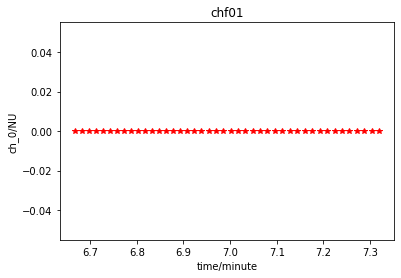

In [20]:
annotation = wfdb.rdann('E:/AI project/files/chf01', 'ecg', sampfrom=100000, sampto=110000)

wfdb.plot_wfdb(annotation=annotation, time_units='minutes')


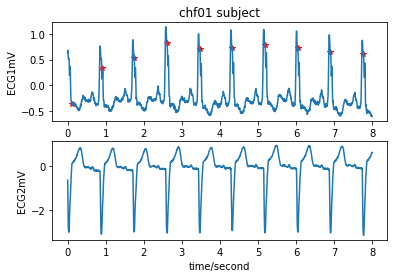

In [4]:
import wfdb
record = wfdb.rdrecord('E:/AI project/files/chf01', sampto = 2000)
annotation = wfdb.rdann('E:/AI project/files/chf01', 'ecg', sampto = 2000)

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='chf01 subject',
               time_units='seconds')

In [76]:
annotation.__dict__

{'record_name': 'chf01',
 'extension': 'ecg',
 'sample': array([ 28, 224, 438]),
 'symbol': ['N', 'N', 'N'],
 'subtype': array([0, 0, 0]),
 'chan': array([0, 0, 0]),
 'num': array([0, 0, 0]),
 'aux_note': ['', '', ''],
 'fs': 250,
 'label_store': None,
 'description': None,
 'custom_labels': None,
 'contained_labels': None,
 'ann_len': 3}

In [28]:

record = wfdb.rdrecord('E:/AI project/files/chf01', sampfrom=800)
record

In [29]:
display(record.__dict__)

{'record_name': 'chf01',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 17993691,
 'base_time': datetime.time(10, 0, 3, 200000),
 'base_date': None,
 'comments': ['Age: 71  Sex: M  NYHA class: III-IV'],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': array([[-0.185, -0.025],
        [-0.18 , -0.015],
        [-0.16 , -0.02 ],
        ...,
        [ 2.265, -0.52 ],
        [ 2.245, -0.5  ],
        [ 2.245, -0.515]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['chf01.dat', 'chf01.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-37, -5],
 'checksum': [51783, 35296],
 'block_size': [0, 0]}

In [36]:
display(ann.__dict__)['symbol']

{'record_name': 'chf01',
 'extension': 'ecg',
 'sample': array([      28,      224,      438, ..., 17993841, 17994098, 17994362]),
 'symbol': ['N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N'

TypeError: 'NoneType' object is not subscriptable

{'record_name': 'chf01',
 'extension': 'ecg',
 'sample': [10, 20, 400],
 'symbol': ['N', 'N', '['],
 'subtype': None,
 'chan': None,
 'num': None,
 'aux_note': None,
 'fs': None,
 'label_store': None,
 'description': None,
 'custom_labels': None,
 'contained_labels': None,
 'ann_len': 3}

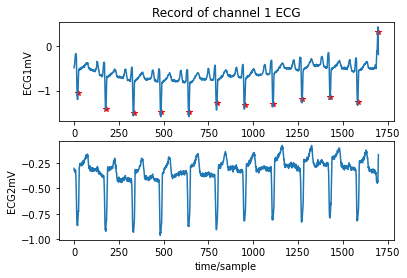

In [89]:
record2 = wfdb.rdrecord('E:/AI project/files/chf02',sampfrom=0,sampto=1700)

ann2=wfdb.rdann('E:/AI project/files/chf02','ecg-',sampfrom=0,sampto=1700)
d=ann2.__dict__
wfdb.plot_wfdb(record2, ann2, title='Record of channel 1 ECG')

In [90]:
ann3=wfdb.rdann('E:/AI project/files/chf02','ecg-')
d=ann3.__dict__

In [93]:
d

{'record_name': 'chf02',
 'extension': 'ecg-',
 'sample': array([      22,      177,      333, ..., 17792633, 17792820, 17792941]),
 'symbol': ['N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'V',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N

In [91]:
d['symbol']

['N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'V',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N'

In [183]:
ann3=wfdb.rdann('E:/AI project/files/chf02','ecg').__dict__


In [184]:
ann3

{'record_name': 'chf02',
 'extension': 'ecg',
 'sample': array([      22,      176,      332, ..., 17792633, 17792820, 17792941]),
 'symbol': ['N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'V',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N'

In [92]:
ann3.sumann()

AttributeError: 'Annotation' object has no attribute 'sumann'

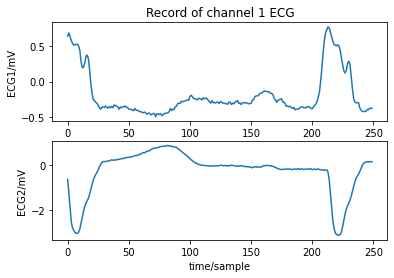

{'record_name': 'chf01',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 250,
 'base_time': datetime.time(10, 0),
 'base_date': None,
 'comments': ['Age: 71  Sex: M  NYHA class: III-IV'],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': array([[ 0.635, -0.64 ],
        [ 0.68 , -1.28 ],
        [ 0.63 , -1.92 ],
        [ 0.57 , -2.535],
        [ 0.535, -2.8  ],
        [ 0.51 , -2.9  ],
        [ 0.515, -2.99 ],
        [ 0.52 , -3.03 ],
        [ 0.525, -3.025],
        [ 0.495, -2.975],
        [ 0.43 , -2.825],
        [ 0.275, -2.565],
        [ 0.195, -2.305],
        [ 0.2  , -2.05 ],
        [ 0.26 , -1.835],
        [ 0.355, -1.695],
        [ 0.37 , -1.59 ],
        [ 0.315, -1.465],
        [ 0.155, -1.29 ],
        [-0.035, -1.075],
        [-0.17 , -0.87 ],
        [-0.255, -0.66 ],
        [-0.265, -0.535],
        [-0.29 , -0.43 ],
        [-0.3  , -0.335],
        [-0.335, -0.22 ],
        [-0.365, -0.08 ],
        [-0.385,  0.015],
      

In [74]:
record2 = wfdb.rdrecord('E:/AI project/files/chf01',sampfrom=0,sampto=250)
wfdb.plot_wfdb(record2, title='Record of channel 1 ECG') 
display(record2.__dict__)

In [94]:
wfdb.__version__

'3.4.1'

In [96]:
wfdb.wfdbdesc('E:/AI project/files/chf01')

Record E:/AI project/files/chf01
Notes
=====
 Age: 71  Sex: M  NYHA class: III-IV
=====

Starting time: not specified
Length: 19:59:37.964000 (17994491 sample intervals)
Sampling frequency: 250 Hz
2 signals
Group 0, Signal 0:
 File: chf01.dat
 Description: ECG1
 Gain: 200.0 mV
 Initial value: 127
 Storage format: 212 (1 sample per frame)
 I/O: can be unbuffered
 ADC resolution: 12 bits
 ADC zero: 0
 Baseline: 0
 Checksum: 17579
Group 0, Signal 1:
 File: chf01.dat
 Description: ECG2
 Gain: 200.0 mV
 Initial value: -128
 Storage format: 212 (1 sample per frame)
 I/O: can be unbuffered
 ADC resolution: 12 bits
 ADC zero: 0
 Baseline: 0
 Checksum: 21162


In [107]:
l=wfdb.ann2rr('E:/AI project/files/chf01','ecg')
l[:6]

array([ 28, 196, 214, 215, 215, 213])

In [118]:
wfdb.wfdb2mat('E:/AI project/files/chf01')

Source: record E:/AI project/files/chf01		Start: [10:00:00.000000]
val has 2 rows (signals) and 17994491 columns (samples/signal)
Duration: 19:59:37.964000
Sampling frequency: 250 Hz	Sampling interval: 0.004 sec
Row    Signal              Gain             Base      Units     
0      ECG1                200.0            0         mV        
1      ECG2                200.0            0         mV        


ValueError: File names should only contain alphanumerics, hyphens, and an extension. eg. record-100.dat

In [123]:
x=wfdb.rdheader('E:/AI project/files/chf01')
x.__dict__

{'record_name': 'chf01',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 17994491,
 'base_time': datetime.time(10, 0),
 'base_date': None,
 'comments': ['Age: 71  Sex: M  NYHA class: III-IV'],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': None,
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['chf01.dat', 'chf01.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [127, -128],
 'checksum': [17579, 21162],
 'block_size': [0, 0]}

In [179]:
import os
import glob
os.getcwd()
import pandas as pd
import numpy as np


In [162]:
os.chdir('E:/AI project/files')

In [2]:
import glob
ant_files=glob.glob('files/*.ecg')
ant_files

['files\\chf01.ecg',
 'files\\chf02.ecg',
 'files\\chf03.ecg',
 'files\\chf04.ecg',
 'files\\chf05.ecg',
 'files\\chf06.ecg',
 'files\\chf07.ecg',
 'files\\chf08.ecg',
 'files\\chf09.ecg',
 'files\\chf10.ecg',
 'files\\chf11.ecg',
 'files\\chf12.ecg',
 'files\\chf13.ecg',
 'files\\chf14.ecg',
 'files\\chf15.ecg']

In [212]:
ant_files=glob.glob('*.ecg') #Get list of all .ecg files in the current folder
ann_files=pd.DataFrame(data=ant_files,columns=['file'])
ann_files.to_csv("annotations_files_list.csv",index=False,header=True) #Write the list to a CSV file

ann=[]
for i in range(len(ann_files)):
    recordname=ann_files['file'][i][:-4] 
    print(recordname)
    annts = wfdb.rdann(recordname,extension=ann_files['file'][i][-3:]).__dict__ # rdsamp() returns the signal as a numpy array  
    
    sample = np.asarray(annts['sample'])
    symbol = np.asarray(annts['symbol'])
    subtype = np.asarray(annts['subtype'])
    chan = np.asarray(annts['chan'])
    num = np.asarray(annts['num'])
    aux_note = np.asarray(annts['aux_note'])
#     recordname_ann=pd.DataFrame({"sample":sample, "symbol":symbol, "subtype":subtype, "chan":chan, "num":num, "aux_note":aux_note })
    path="files/"+recordname+"_annotations.csv"
    with open(path,'w') as f:
#             f.write("{},{}\n".format("Name1", "Name2"))
        for x in zip(sample,symbol,subtype,chan,num,aux_note):
            f.write("{},{},{},{},{},{}\n".format(x[0], x[1], x[2], x[3], x[4], x[5]))
    f.close()


# f.write('sample,symbol,subtype,chan,num,aux_note\n')
#         np.savetxt(f, zip(sample,symbol,subtype,chan,num,aux_note), delimiter=',')
    
#     recordname+"_ann".to_csv(path_or_buf=path)
#     lst=['sample','symbol','subtype','chan','num','aux_note']
    
#     np.savetxt(path,lst,delimiter=",") #Writing the CSV for each record
    print("Files done: %s/%s"% (i+1,len(ann_files)))

chf01
Files done: 1/15
chf02
Files done: 2/15
chf03
Files done: 3/15
chf04
Files done: 4/15
chf05
Files done: 5/15
chf06
Files done: 6/15
chf07
Files done: 7/15
chf08
Files done: 8/15
chf09
Files done: 9/15
chf10


KeyboardInterrupt: 

In [214]:
ann=[]
for i in range(len(ann_files)):
    recordname=ann_files['file'][i][:-4] 
    print(recordname)
    annts = wfdb.rdann(recordname,extension=ann_files['file'][i][-3:]).__dict__ # rdsamp() returns the signal as a numpy array 
    dct={"record_id":recordname, "extension":annts['extension'], "fs":annts['fs'], "label_store":annts['label_store'], "description":annts['description'], "custom_labels":annts['custom_labels'], "contained_labels":annts['contained_labels'], "ann_len":annts['ann_len']}
    ann.append(dct)

df_1=pd.DataFrame(ann)

chf01
chf02
chf03
chf04
chf05
chf06
chf07
chf08
chf09
chf10
chf11
chf12
chf13
chf14
chf15


In [215]:
df_1

,record_id,extension,fs,label_store,description,custom_labels,contained_labels,ann_len
0,chf01,ecg,250,None,None,None,None,75548
1,chf02,ecg,250,None,None,None,None,114548
2,chf03,ecg,250,None,None,None,None,81301
3,chf04,ecg,250,None,None,None,None,112366
4,chf05,ecg,250,None,None,None,None,119153
5,chf06,ecg,250,None,None,None,None,118634
6,chf07,ecg,250,None,None,None,None,92584
7,chf08,ecg,250,None,None,None,None,90759
8,chf09,ecg,250,None,None,None,None,115052
9,chf10,ecg,250,None,None,None,None,147305


In [206]:
aux_noteaa

array(['', '', '', ..., '', '', ''], dtype='<U3')

In [181]:
ann_files

,file
0,chf01.ecg
1,chf02.ecg
2,chf03.ecg
3,chf04.ecg
4,chf05.ecg
5,chf06.ecg
6,chf07.ecg
7,chf08.ecg
8,chf09.ecg
9,chf10.ecg


In [186]:
d

{'record_name': 'chf02',
 'extension': 'ecg',
 'sample': array([      22,      176,      332, ..., 17792633, 17792820, 17792941]),
 'symbol': ['N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'V',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N'

In [207]:
d_aa=pd.DataFrame()
d_aa['a']=d['sample']
d_aa['b']=d['symbol']
d_aa['c']=d['subtype']
d_aa['d']=d['chan']
d_aa['e']=d['num']
d_aa

,a,b,c,d,e
0,22,N,0,0,0
1,176,N,0,0,0
2,332,N,0,0,0
3,485,N,0,0,0
4,641,N,0,0,0
...,...,...,...,...,...
114543,17792393,N,0,0,0
114544,17792535,N,0,0,0
114545,17792633,V,0,0,0
114546,17792820,N,0,0,0


In [198]:
for i in ['sample','symbol']:
    c[i]=pd.DataFrame.from_dict(d[i])
    

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [204]:
np.unique(d['symbol'],return_counts=True)

(array(['N', 'Q', 'S', 'V'], dtype='<U1'),
 array([91031,     4,     3, 23510], dtype=int64))

In [201]:
c

,record_name,extension,sample,symbol,subtype,chan,num,aux_note,fs,label_store,description,custom_labels,contained_labels,ann_len
0,chf02,ecg,22,N,0,0,0,,250,None,None,None,None,114548
1,chf02,ecg,176,N,0,0,0,,250,None,None,None,None,114548
2,chf02,ecg,332,N,0,0,0,,250,None,None,None,None,114548
3,chf02,ecg,485,N,0,0,0,,250,None,None,None,None,114548
4,chf02,ecg,641,N,0,0,0,,250,None,None,None,None,114548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114543,chf02,ecg,17792393,N,0,0,0,,250,None,None,None,None,114548
114544,chf02,ecg,17792535,N,0,0,0,,250,None,None,None,None,114548
114545,chf02,ecg,17792633,V,0,0,0,,250,None,None,None,None,114548
114546,chf02,ecg,17792820,N,0,0,0,,250,None,None,None,None,114548


## PROCESSING

In [220]:
df=pd.read_csv("chf01.csv",names=['ECG1','ECG2'])
df

,ECG1,ECG2
0,0.635,-0.640
1,0.680,-1.280
2,0.630,-1.920
3,0.570,-2.535
4,0.535,-2.800
...,...,...
17994486,2.255,-0.520
17994487,2.245,-0.530
17994488,2.265,-0.520
17994489,2.245,-0.500


In [221]:
import matplotlib.pyplot as plt

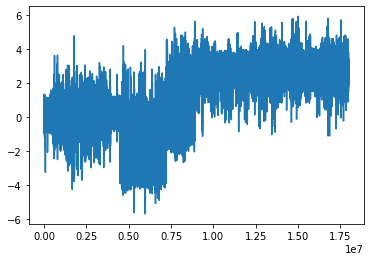

In [222]:
fig,ax=plt.subplots()
ax.plot(df['ECG1'])

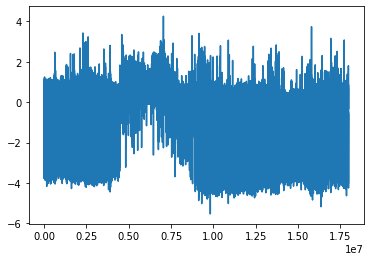

In [224]:
fig,ax=plt.subplots()
ax.plot(df['ECG2'])

In [2]:
import os
os.chdir('E:/AI project/normal')

In [3]:
import wfdb
wfdb.rdrecord('16265').__dict__

{'record_name': '16265',
 'n_sig': 2,
 'fs': 128,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 11730944,
 'base_time': datetime.time(8, 4),
 'base_date': None,
 'comments': ['32 M'],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': array([[-0.165, -0.325],
        [-0.155, -0.325],
        [-0.195, -0.305],
        ...,
        [-0.05 , -0.095],
        [-0.05 , -0.085],
        [-0.05 , -0.085]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['16265.dat', '16265.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-33, -65],
 'checksum': [15756, -21174],
 'block_size': [0, 0]}

In [6]:
wfdb.rdrecord('16265',sampfrom=11730943,)

In [8]:
wfdb.rdann('16265','atr').__dict__

{'record_name': '16265',
 'extension': 'atr',
 'sample': array([       1,       52,      129, ..., 10247715, 10247823, 10247936]),
 'symbol': ['|',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N'

In [ ]:
ant_files=glob.glob('*.atr') #Get list of all .ecg files in the current folder
ann_files=pd.DataFrame(data=ant_files,columns=['file'])
ann_files.to_csv("annotations_files_list.csv",index=False,header=True) #Write the list to a CSV file

ann=[]
for i in range(len(ann_files)):
    recordname=ann_files['file'][i][:-4] 
    print(recordname)
    annts = wfdb.rdann(recordname,extension=ann_files['file'][i][-3:]).__dict__ # rdsamp() returns the signal as a numpy array  
    
    sample = np.asarray(annts['sample'])
    symbol = np.asarray(annts['symbol'])
    subtype = np.asarray(annts['subtype'])
    chan = np.asarray(annts['chan'])
    num = np.asarray(annts['num'])
    aux_note = np.asarray(annts['aux_note'])
#     recordname_ann=pd.DataFrame({"sample":sample, "symbol":symbol, "subtype":subtype, "chan":chan, "num":num, "aux_note":aux_note })
    path=recordname+"_annotations.csv"
    with open(path,'w') as f:
#             f.write("{},{}\n".format("Name1", "Name2"))
        for x in zip(sample,symbol,subtype,chan,num,aux_note):
            f.write("{},{},{},{},{},{}\n".format(x[0], x[1], x[2], x[3], x[4], x[5]))
    f.close()


# f.write('sample,symbol,subtype,chan,num,aux_note\n')
#         np.savetxt(f, zip(sample,symbol,subtype,chan,num,aux_note), delimiter=',')
    
#     recordname+"_ann".to_csv(path_or_buf=path)
#     lst=['sample','symbol','subtype','chan','num','aux_note']
    
#     np.savetxt(path,lst,delimiter=",") #Writing the CSV for each record
    print("Files done: %s/%s"% (i+1,len(ann_files)))

In [16]:
import glob
import numpy as np
import pandas as pd
ant_files=glob.glob('*.atr') #Get list of all .ecg files in the current folder
ann_files=pd.DataFrame(data=ant_files,columns=['file'])
ann_files.to_csv("annotations_files_list.csv",index=False,header=True) #Write the list to a CSV file

ann=[]
for i in range(len(ann_files)):
    recordname=ann_files['file'][i][:-4] 
    print(recordname)
    annts = wfdb.rdann(recordname,extension=ann_files['file'][i][-3:]).__dict__ # rdsamp() returns the signal as a numpy array  
    
    sample = np.asarray(annts['sample'])
    symbol = np.asarray(annts['symbol'])
    subtype = np.asarray(annts['subtype'])
    chan = np.asarray(annts['chan'])
    num = np.asarray(annts['num'])
    aux_note = np.asarray(annts['aux_note'])
    path=recordname+"_annotations.csv"
    with open(path,'w') as f:
        for x in zip(sample,symbol,subtype,chan,num,aux_note):
            f.write("{},{},{},{},{},{}\n".format(x[0], x[1], x[2], x[3], x[4], x[5]))
    f.close()

    print("Files done: %s/%s"% (i+1,len(ann_files)))

16265
Files done: 1/18
16272
Files done: 2/18
16273
Files done: 3/18
16420
Files done: 4/18
16483


KeyboardInterrupt: 

In [22]:
dat_files=glob.glob('*.dat') #Get list of all .dat files in the current folder
files=pd.DataFrame(data=dat_files,columns=['file'])
files.to_csv("files_list.csv",index=False,header=True) #Write the list to a CSV file

meta=[]
for i in range(len(files)):
    recordname=files['file'][i][:-4]
    print(recordname)
    sig,fields = wfdb.rdsamp(recordname) # rdsamp() returns the signal as a numpy array  
    record=np.asarray(sig)
    path=recordname+".csv"
    np.savetxt(path,record,delimiter=",") #Writing the CSV for each record
    print("Files done: %s/%s"% (i+1,len(files)))
    
    dct = {}
    dct.update({"record_id": recordname})
    dct.update(fields)
    meta.append(dct)

df = pd.DataFrame(meta)

16265
Files done: 1/18
16272


KeyboardInterrupt: 

In [57]:
sig,fields=wfdb.rdsamp('16265')

In [64]:
np.asarray(sig).dtype()

TypeError: 'numpy.dtype' object is not callable

In [24]:
fields

{'fs': 128,
 'sig_len': 11730944,
 'n_sig': 2,
 'base_date': None,
 'base_time': datetime.time(8, 4),
 'units': ['mV', 'mV'],
 'sig_name': ['ECG1', 'ECG2'],
 'comments': ['32 M']}

In [27]:
x=wfdb.rdann('16265','atr').__dict__

# ann_sample=x['sample']
# ann_sample

array([       1,       52,      129, ..., 10247715, 10247823, 10247936])

In [28]:
x['sample']

array([       1,       52,      129, ..., 10247715, 10247823, 10247936])

In [29]:
x

{'record_name': '16265',
 'extension': 'atr',
 'sample': array([       1,       52,      129, ..., 10247715, 10247823, 10247936]),
 'symbol': ['|',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N'

In [34]:
set(x['chan'])

{0, 16, 32}

In [35]:
set(x['num'])

{0,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49}

In [36]:
ann3=wfdb.rdann('E:/AI project/files/chf02','ecg').__dict__


In [38]:
set(ann3['chan'])

{0}

In [65]:
dat_files=glob.glob('*.dat') #Get list of all .dat files in the current folder
files=pd.DataFrame(data=dat_files,columns=['file'])

ant_files=glob.glob('*.atr') #Get list of all .atr files in the current folder
ann_files=pd.DataFrame(data=ant_files,columns=['file'])

for i in range(len(files)):
    recordname=files['file'][i][:-4]
    sig,fields = wfdb.rdsamp(recordname) # rdsamp() returns the signal as a numpy array  
    record=np.asarray(sig)
#     record=wfdb.rdrecord(recordname)
    annts = wfdb.rdann(recordname,extension='atr') # rdann() returns the annotations of a file.
    
#The MIT-BIH has three channel records
# sig_fs=normal_signals_records['fs'][0]    #original sampling frequency, taken from the singnals records dataframe of normal subjects
# targ_fs=chf_signals_records['fs'][0]      #target sampling frequency, taken from the signals records dataframe of chf subjects

    wfdb.processing.resample_multichan(record, annts, fs=128, fs_target=250, resamp_ann_chan=0)

In [ ]:
def qrs_detection(ds):
    for i in range(ds.index):
        #Low-Pass filter
        #creating a low pass filter with difference equation:- y(nT) = 2y(nT - T) - y(nT - 2 T) + x(nT)- 2x(nT- 6T)+x(nT- 12T)
        #here T is the sampling period and it is 1 for our signal (the distance between two samples)
        

In [207]:
df=pd.read_csv('16265_resampled_signal.csv',names=['ECG1','ECG2'])
import scipy.signal as st
def low_pass(x):
    b=[]
    for i in range(13):
        if i==0:
            b.append(1/32)
        elif i==6:
            b.append(-2/32)
        elif i==12: 
            b.append(1/32)
        else:
            b.append(0)
    B=np.array(b)
    A=np.array([1,-2,1])
    sig_low= st.lfilter(B,A,x,axis=0)

In [205]:
df

,ECG1,ECG2
0,-0.165000,-0.325000
1,-0.168776,-0.355663
2,-0.154753,-0.323248
3,-0.167232,-0.300683
4,-0.197550,-0.305925
...,...,...
22911995,-0.061830,-0.112931
22911996,-0.052224,-0.089411
22911997,-0.030573,-0.048254
22911998,-0.047777,-0.080804


In [209]:
df['ECG1']=low_pass(df['ECG1'])

In [210]:
df

,ECG1,ECG2
0,None,-0.325000
1,None,-0.355663
2,None,-0.323248
3,None,-0.300683
4,None,-0.305925
...,...,...
22911995,None,-0.112931
22911996,None,-0.089411
22911997,None,-0.048254
22911998,None,-0.080804


In [177]:
l=list(range(3))
a=[0,6,12]
for i in l:
    [l if l in a ]

[0, 1, 2]

In [191]:
a=[0,6,12]
x1=0
x2=6
x3=12
l=[1 if x in a else 0 for x in range(13)]

In [192]:
l

[0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 12]

In [199]:
b=[]
for i in range(13):
    if i==0:
        b.append(1/32)
    elif i==6:
        b.append(-2/32)
    elif i==12: 
        b.append(1/32)
    else:
        b.append(0)
b

[0.03125, 0, 0, 0, 0, 0, -0.0625, 0, 0, 0, 0, 0, 0.03125]

In [235]:
sig,fields=wfdb.rdsamp('16265')
annts=wfdb.rdann('16265','atr')
signal,ann=wfdb.processing.resample_multichan(record, annts, fs=128, fs_target=200, resamp_ann_chan=0)


In [236]:
signal

array([[-0.435     , -0.425     ],
       [-0.47476729, -0.46637377],
       [-0.40837534, -0.38419985],
       ...,
       [-0.08169738,  0.01114412],
       [-0.05502384,  0.05496879],
       [-0.21387227, -0.14531465]])

In [237]:
norm_signal=wfdb.processing.normalize_bound(signal)

In [264]:
def low_pass(x):
    b=[]
    for i in range(13):
        if i==0:
            b.append(1)
        elif i==6:
            b.append(-2)
        elif i==12: 
            b.append(1)
        else:
            b.append(0)
    B=np.array(b)
    A=np.array([1,-2,1])
    y= st.lfilter(B,A,x)
    return y

In [265]:
sig_low=low_pass(norm_signal)

In [266]:
sig_low

array([[0.36864274, 1.10813739],
       [0.35985742, 1.08142655],
       [0.37452461, 1.12891462],
       ...,
       [0.44669368, 1.36059141],
       [0.45258635, 1.3820584 ],
       [0.41749385, 1.26762718]])

In [268]:
def high_pass(x):
    b=[]
    for i in range(33):
        if i==0:
            b.append(-1)
        elif i==16:
            b.append(32)
        elif i==32: 
            b.append(1)
        else:
            b.append(0)
    B=np.array(b)
    A=np.array([1,1])
    y= st.lfilter(B,A,x)
    return y

In [269]:
sig_high=high_pass(sig_low)
sig_high

array([[-0.36864274, -0.73949466],
       [-0.35985742, -0.72156913],
       [-0.37452461, -0.75439002],
       ...,
       [-0.44669368, -0.91389773],
       [-0.45258635, -0.92947205],
       [-0.41749385, -0.85013333]])

In [ ]:
def derivative(x):
    b=[]
    for i in range(33):
        if i==0:
            b.append(-1)
        elif i==16:
            b.append(32)
        elif i==32: 
            b.append(1)
        else:
            b.append(0)
    B=np.array(b)
    A=np.array([1,1])
    y= st.lfilter(B,A,x)

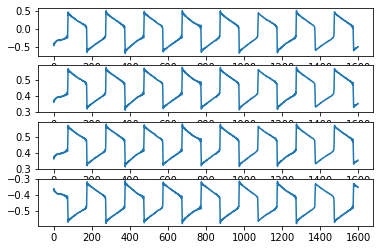

In [271]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(4)
ax[0].plot(signal[0:1600,0])
ax[1].plot(norm_signal[0:1600,0])
ax[2].plot(sig_low[0:1600,0])
ax[3].plot(sig_high[0:1600,0])

In [273]:
xqrs = wfdb.processing.XQRS(sig=signal[:,0],fs=200)
xqrs.detect()

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


In [283]:
x=xqrs.__dict__
x

{'sig': array([-0.435     , -0.47476729, -0.40837534, ..., -0.08169738,
        -0.05502384, -0.21387227]),
 'fs': 200,
 'sig_len': 16721600,
 'conf': <wfdb.processing.qrs.XQRS.Conf at 0x258829a2550>,
 'rr_init': 160.0,
 'rr_max': 480.0,
 'rr_min': 60.0,
 'qrs_width': 20,
 'qrs_radius': 10,
 'qrs_thr_init': 0.13,
 'qrs_thr_min': 0,
 'ref_period': 40,
 't_inspect_period': 0,
 'sampfrom': 0,
 'sampto': 16721600,
 'verbose': True,
 'fc_low': 5,
 'fc_high': 20,
 'sig_f': array([ 0.00078943, -0.00121837, -0.00230733, ...,  0.07534449,
         0.0469447 ,  0.00943285]),
 'filter_gain': 1.9933667632437722,
 'sig_i': array([1.27009340e-08, 4.41914868e-05, 1.42174038e-04, ...,
        1.45110920e-01, 4.30551246e-02, 1.81341609e-06]),
 'mwi_gain': 6.129640439338934,
 'transform_gain': 12.218621522413185,
 'peak_inds_i': array([       3,       21,       39, ..., 16721539, 16721567, 16721595]),
 'n_peaks_i': 376990,
 'qrs_amp_recent': 5.418658439501899,
 'noise_amp_recent': 0.0362310765030613,
 '

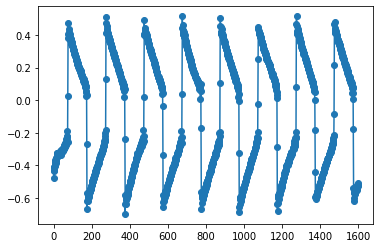

In [281]:
fig=plt.plot(signal[0:1600,0],'o-')


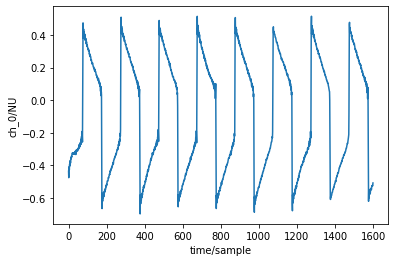

In [285]:
wfdb.plot_items(signal=signal[:1600,0])

In [289]:
!pip install scipy

In [298]:
import scipy.signal as st
def band_pass(x):
    N=1
    Wn=np.array([5,12])
    b,a=st.butter(N, Wn, btype='bandpass', analog=False, output='ba', fs=200)
    y=st.lfilter(b,a,x,axis=1)
    return y
filtered_sig=band_pass(norm_signal)

In [287]:
norm_signal

array([[0.36864274, 0.37085192],
       [0.35985742, 0.3617117 ],
       [0.37452461, 0.37986541],
       ...,
       [0.44669368, 0.46720405],
       [0.45258635, 0.47688571],
       [0.41749385, 0.43263947]])

In [296]:
filtered_sig

array([[0.00384583, 0.01764392],
       [0.00375418, 0.01722029],
       [0.0039072 , 0.01795774],
       ...,
       [0.00466009, 0.02156563],
       [0.00472157, 0.02188682],
       [0.00435547, 0.02011393]])

In [299]:
filtered_sig

array([[0.03665211, 0.10093484],
       [0.03577863, 0.09849936],
       [0.03723691, 0.10285316],
       ...,
       [0.04441228, 0.12407836],
       [0.04499816, 0.12606499],
       [0.0415091 , 0.11556743]])

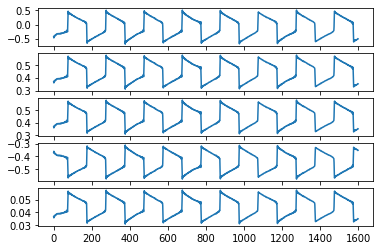

In [300]:
fig,ax=plt.subplots(5)
ax[0].plot(signal[0:1600,0])
ax[1].plot(norm_signal[0:1600,0])
ax[2].plot(sig_low[0:1600,0])
ax[3].plot(sig_high[0:1600,0])
ax[4].plot(filtered_sig[0:1600,0])

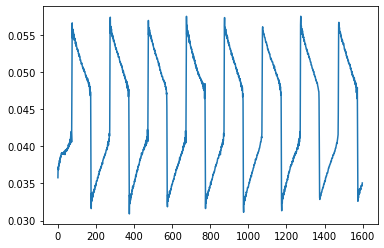

In [305]:
fig=plt.plot(filtered_sig[1:1600,0])

In [355]:
df=pd.DataFrame(filtered_sig[:,0])
def derivative(x):
    y=x.copy()
    for n in x.index:
        if (n<2):
            continue
        if (n==(len(x.index)-2)):
            break
        y.iloc[n,0]=(-1*(x.iloc[n-2,0]) - 2*(x.iloc[n-1,0]) + 2*(x.iloc[n+1,0])+ (x.iloc[n+2,0]))/8
        print("done")
    return y


In [377]:
df=pd.DataFrame(filtered_sig[:,0])
x=df.copy()
for i in range(len(df)):
    if (i<2):
        continue
    if i==(len(df)-2):
        break
    df.iloc[i,0]=(-1*(x.iloc[n-2,0]) - 2*(x.iloc[n-1,0]) + 2*(x.iloc[n+1,0])+ (x.iloc[n+2,0]))/8

In [375]:
len(df.index)

16721600

In [376]:
len(df)

16721600

In [363]:
df.index

RangeIndex(start=0, stop=16721600, step=1)

In [362]:
for x in range(3):
    print(x)

0
1
2


In [343]:
df=pd.DataFrame([1,2,3,4,5,6,7,8,9,10,11])

def derivative(x):
    y=x.copy()
    for n in x.index:
        if (n<2):
            continue
        if (n==(len(x.index)-2)):
            break
        y.iloc[n,0]=(-1*(x.iloc[n-2,0]) - 2*(x.iloc[n-1,0]) + 2*(x.iloc[n+1,0])+ (x.iloc[n+2,0]))/8
        
    return y

In [344]:
z=derivative(df)

In [345]:
z


,0
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,10.0


In [ ]:
#current file directory: "E:/AI project/normal"
dat_files=glob.glob('*.dat') #Get list of all .dat files in the current folder
files=pd.DataFrame(data=dat_files,columns=['file'])

#The MIT-BIH has three channel records
sig_fs=normal_signals_records['fs'][0]    #original sampling frequency, taken from the singnals records dataframe of normal subjects
targ_fs=chf_signals_records['fs'][0]      #target sampling frequency, taken from the signals records dataframe of chf subjects

for i in range(len(files)):
    recordname=files['file'][i][:-4]
    print(recordname)
    
    sig,fields = wfdb.rdsamp(recordname) # rdsamp() returns the signal as a numpy array  
    record=np.asarray(sig)
    annts = wfdb.rdann(recordname,extension='atr')# rdann() returns the annotations of a file.
    
    #resampling the signal
    signal,ann=wfdb.processing.resample_multichan(record, annts, fs=sig_fs, fs_target=targ_fs, resamp_ann_chan=0)
    
    #normalizing the signal
    signal=wfdb.processing.normalize_bound(signal, lb=0, ub=1)
    
    
    #csv files to save the resampled signals and annotations
    path=recordname+"_resampled_signal.csv"
    np.savetxt(path,signal,delimiter=",") #Writing the CSV for each record
    res_ann=ann.__dict__
    sample = np.asarray(res_ann['sample'])
    symbol = np.asarray(res_ann['symbol'])
    subtype = np.asarray(res_ann['subtype'])
    chan = np.asarray(res_ann['chan'])
    num = np.asarray(res_ann['num'])
    aux_note = np.asarray(res_ann['aux_note'])
    path=recordname+"_resampled_annotations.csv"
    with open(path,'w') as f:
        for x in zip(sample,symbol,subtype,chan,num,aux_note):
            f.write("{},{},{},{},{},{}\n".format(x[0], x[1], x[2], x[3], x[4], x[5]))
    f.close()
    
    print("Files done: %s/%s"% (i+1,len(files)))